In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/smartphones.csv")

In [3]:
df.head()

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7


In [4]:
df.dtypes

Name         object
OS           object
Capacity      int64
Ram           int64
Weight      float64
Company      object
inch        float64
dtype: object

In [6]:
df.isna().sum()

Name        0
OS          0
Capacity    0
Ram         0
Weight      0
Company     0
inch        0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['OS']=le.fit_transform(df['OS'])
df['Company']=le.fit_transform(df['Company'])
df['Name']=le.fit_transform(df['Name'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
dfn=MinMaxScaler().fit_transform(df)
dfn

array([[0.125     , 0.        , 0.42857143, 1.        , 0.54411765,
        0.83333333, 1.        ],
       [0.25      , 1.        , 0.14285714, 0.66666667, 0.55882353,
        0.5       , 0.66666667],
       [0.75      , 0.        , 0.        , 0.33333333, 1.        ,
        1.        , 0.83333333],
       [1.        , 0.5       , 1.        , 0.33333333, 0.38235294,
        0.        , 0.38888889],
       [0.625     , 0.        , 0.42857143, 1.        , 0.85294118,
        0.33333333, 0.94444444],
       [0.        , 0.        , 0.        , 0.33333333, 0.48529412,
        0.83333333, 0.61111111],
       [0.875     , 0.5       , 0.14285714, 0.        , 0.        ,
        0.        , 0.        ],
       [0.375     , 0.        , 0.        , 0.66666667, 0.47794118,
        0.66666667, 0.55555556],
       [0.5       , 0.        , 1.        , 1.        , 0.45588235,
        0.16666667, 0.55555556]])

In [10]:
k=[1,2,3,4,5,6,7,8]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(dfn)
    ssd.append(model.inertia_)

C:\Users\Ruchita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'k_values')

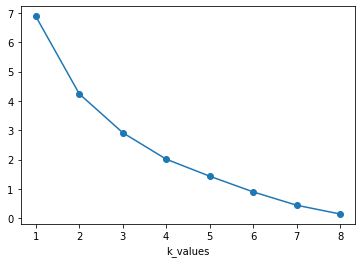

In [11]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("k_values")

In [13]:
model=KMeans(n_clusters=3).fit(df)
model.cluster_centers_

array([[  3.  ,   0.  ,  64.  ,   4.  , 159.5 ,   3.5 ,   5.75],
       [  6.  ,   0.5 , 128.  ,   3.  , 140.5 ,   0.5 ,   4.85],
       [  3.6 ,   0.6 ,  22.4 ,   2.2 , 146.3 ,   3.6 ,   4.96]])

In [14]:
model.inertia_

2956.2419999999997

In [15]:
group=model.labels_

In [16]:
group

array([0, 2, 2, 1, 0, 2, 2, 2, 1])

In [17]:
df['group']=group
df

,Name,OS,Capacity,Ram,Weight,Company,inch,group
0,1,0,64,4,149.0,5,5.8,0
1,2,2,32,3,150.0,3,5.2,2
2,6,0,16,2,180.0,6,5.5,2
3,8,1,128,2,138.0,0,4.7,1
4,5,0,64,4,170.0,2,5.7,0
5,0,0,16,2,145.0,5,5.1,2
6,7,1,32,1,112.0,0,4.0,2
7,3,0,16,3,144.5,4,5.0,2
8,4,0,128,4,143.0,1,5.0,1


In [18]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/smartphones.csv")
df['group']=group
df

,Name,OS,Capacity,Ram,Weight,Company,inch,group
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8,0
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2,2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5,2
3,iphone 7,ios,128,2,138.0,Apple,4.7,1
4,U Ultra,Android,64,4,170.0,HTC,5.7,0
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1,2
6,iphone 5s,ios,32,1,112.0,Apple,4.0,2
7,Moto G5,Android,16,3,144.5,Motorola,5.0,2
8,Pixel,Android,128,4,143.0,Google,5.0,1


In [21]:
group1=df.loc[df.group==1, 'Name']
group1

3    iphone 7 
8       Pixel 
Name: Name, dtype: object

In [22]:
g=df.groupby('group')
A=g.get_group(0)
A

,Name,OS,Capacity,Ram,Weight,Company,inch,group
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8,0
4,U Ultra,Android,64,4,170.0,HTC,5.7,0


In [23]:
h=df.groupby('group')
B=h.get_group(2)
B

,Name,OS,Capacity,Ram,Weight,Company,inch,group
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2,2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5,2
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1,2
6,iphone 5s,ios,32,1,112.0,Apple,4.0,2
7,Moto G5,Android,16,3,144.5,Motorola,5.0,2
